In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (1).csv


In [ ]:
df=pd.read_csv('Zoo.csv') # Reading csv file

In [ ]:
df.head() # Displays the first few rows of the dataset

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.tail() # Displays the last few rows of the dataset

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [ ]:
df.shape # Displays the shape of the dataset

(101, 18)

In [ ]:
df.size # Displays the size of the dataset

1818

In [ ]:
df.info() # Displays the information of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe() # Displays the statistical summary

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum() # Displays the sum of null values in the dataset

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
df.duplicated().sum() # Displays the sum of duplicated values

0

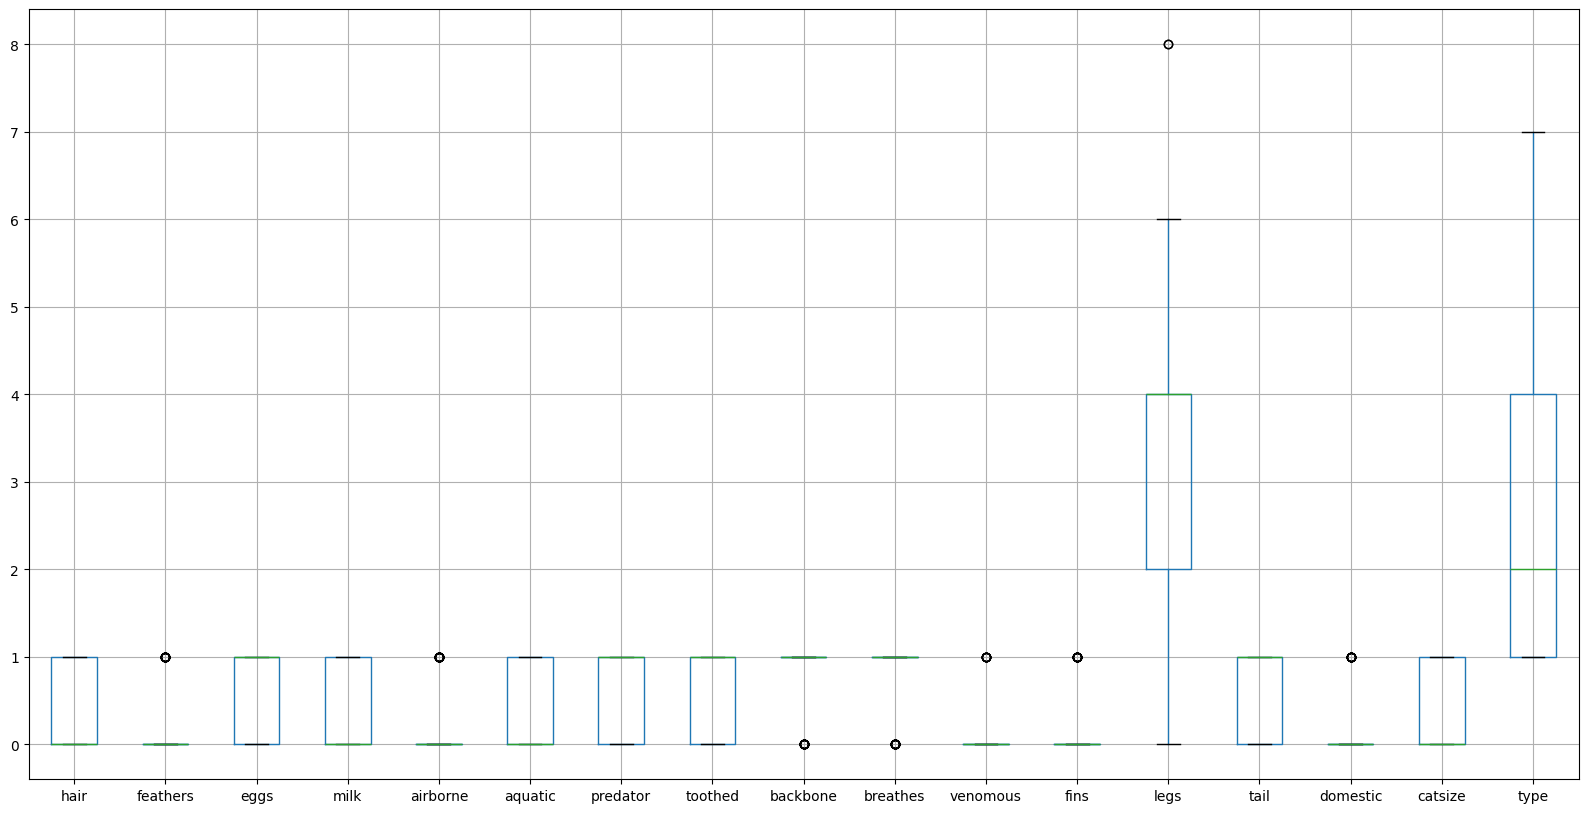

In [ ]:
# Visualize boxplot
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

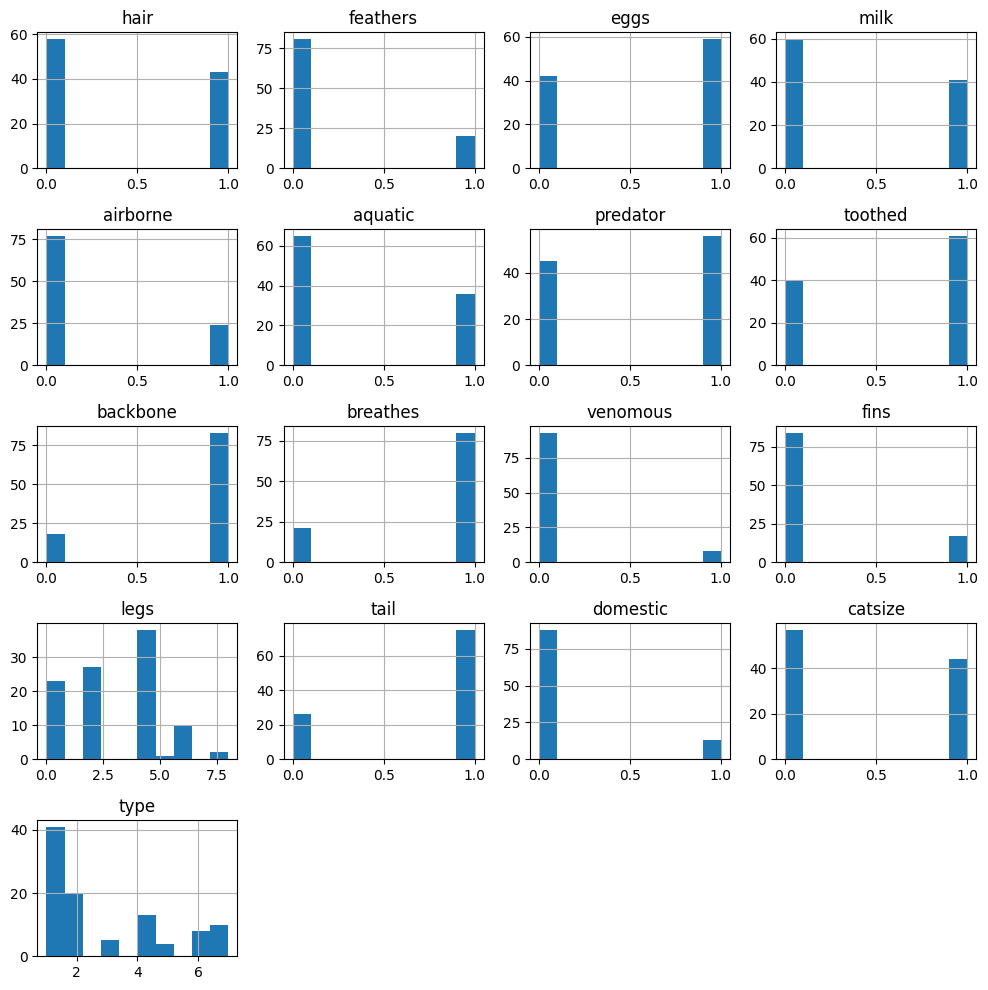

In [ ]:
# Visualize histogram
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

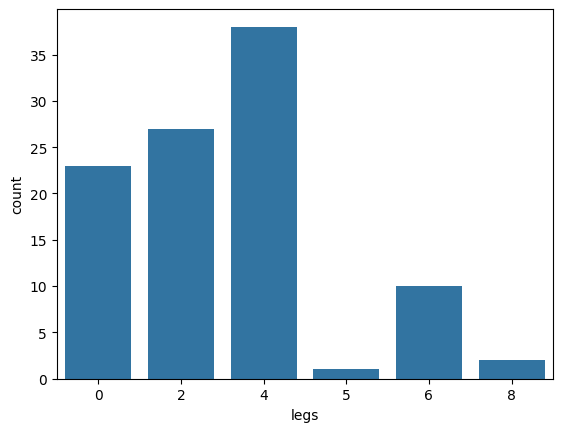

In [ ]:
# Visualize countplot for 'legs' column
sns.countplot(x='legs',data=df)
plt.show()

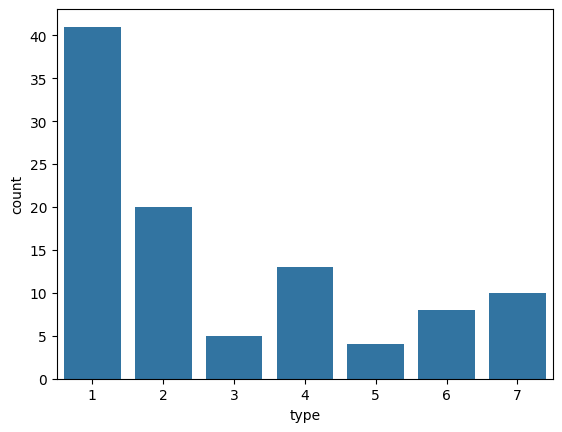

In [ ]:
# Visualize countplot for 'type' column
sns.countplot(x='type',data=df)
plt.show()

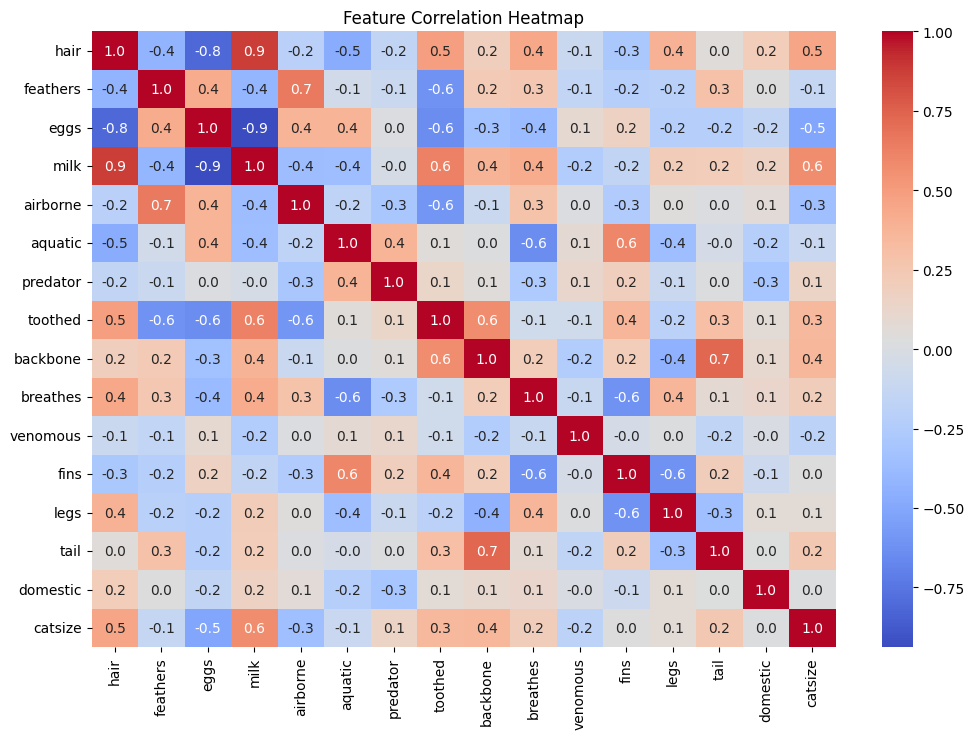

In [ ]:
# Visualize heat map
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['animal name', 'type']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Feature Correlation Heatmap')
plt.show()

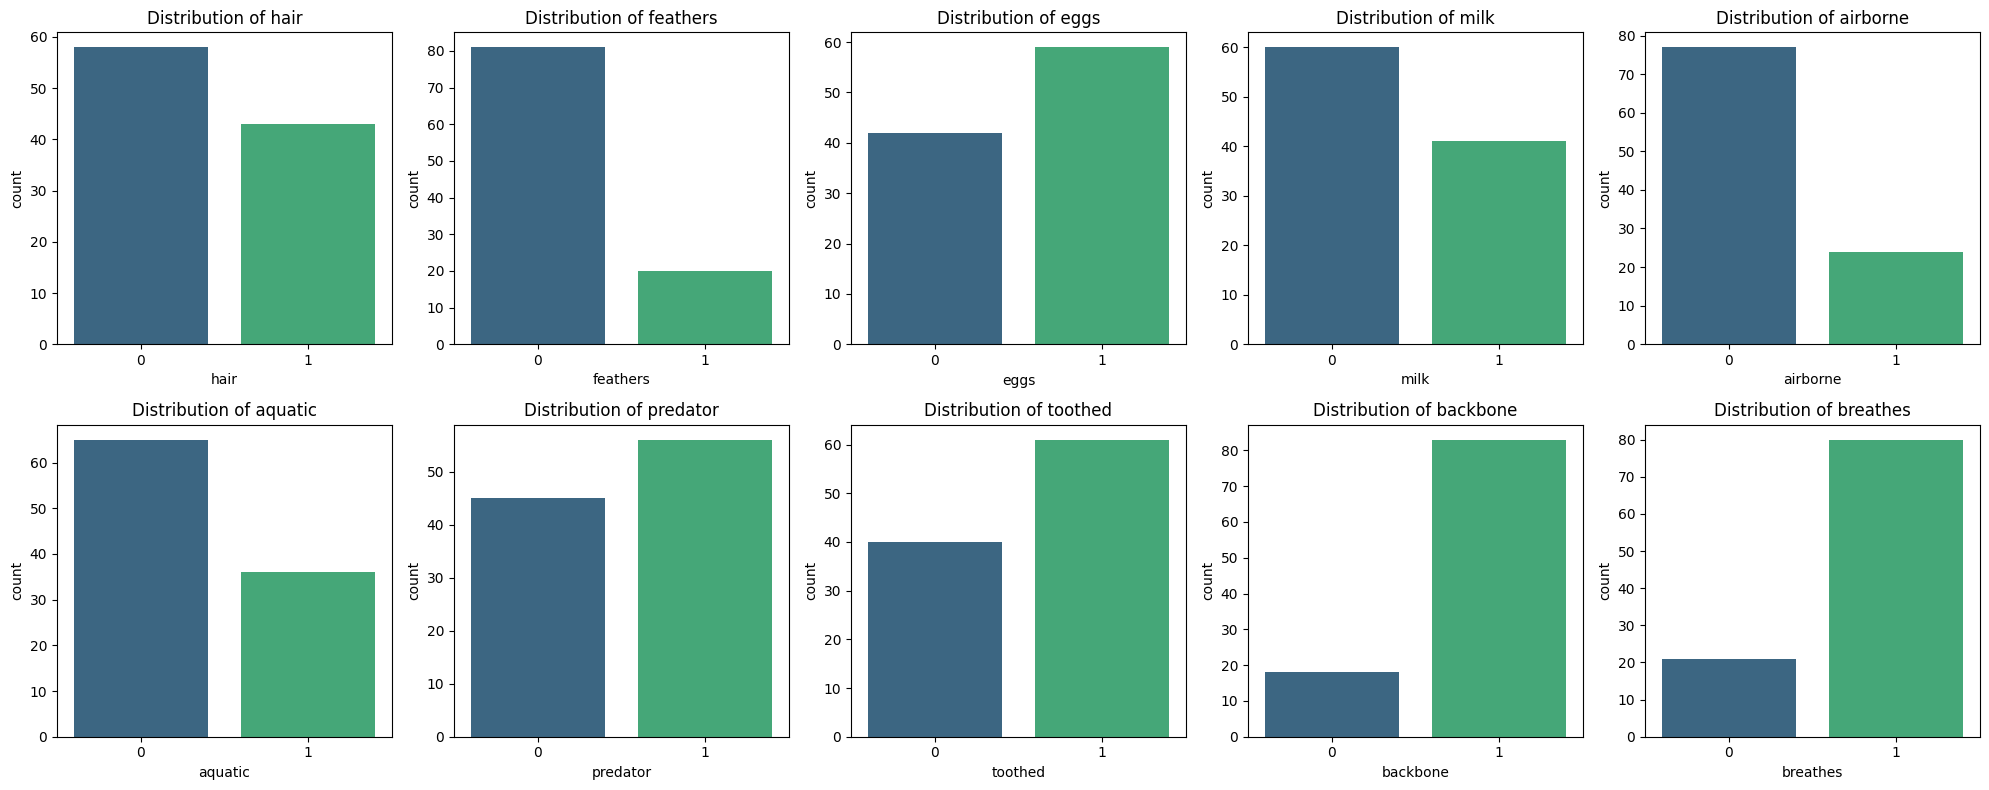

In [ ]:
# Visualize countplot
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes']
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, feature in enumerate(binary_features):
    sns.countplot(x=feature, data=df, palette="viridis", ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
standard_scaler=StandardScaler()
data_scaled=standard_scaler.fit_transform(df[['legs']]) # Applying standard scaler for 'legs' column

In [ ]:
df['legs']=data_scaled

In [ ]:
df.head() # Displays first few rows of the dataset

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,0.572540,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,-1.404435,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,0.572540,1,0,1,1


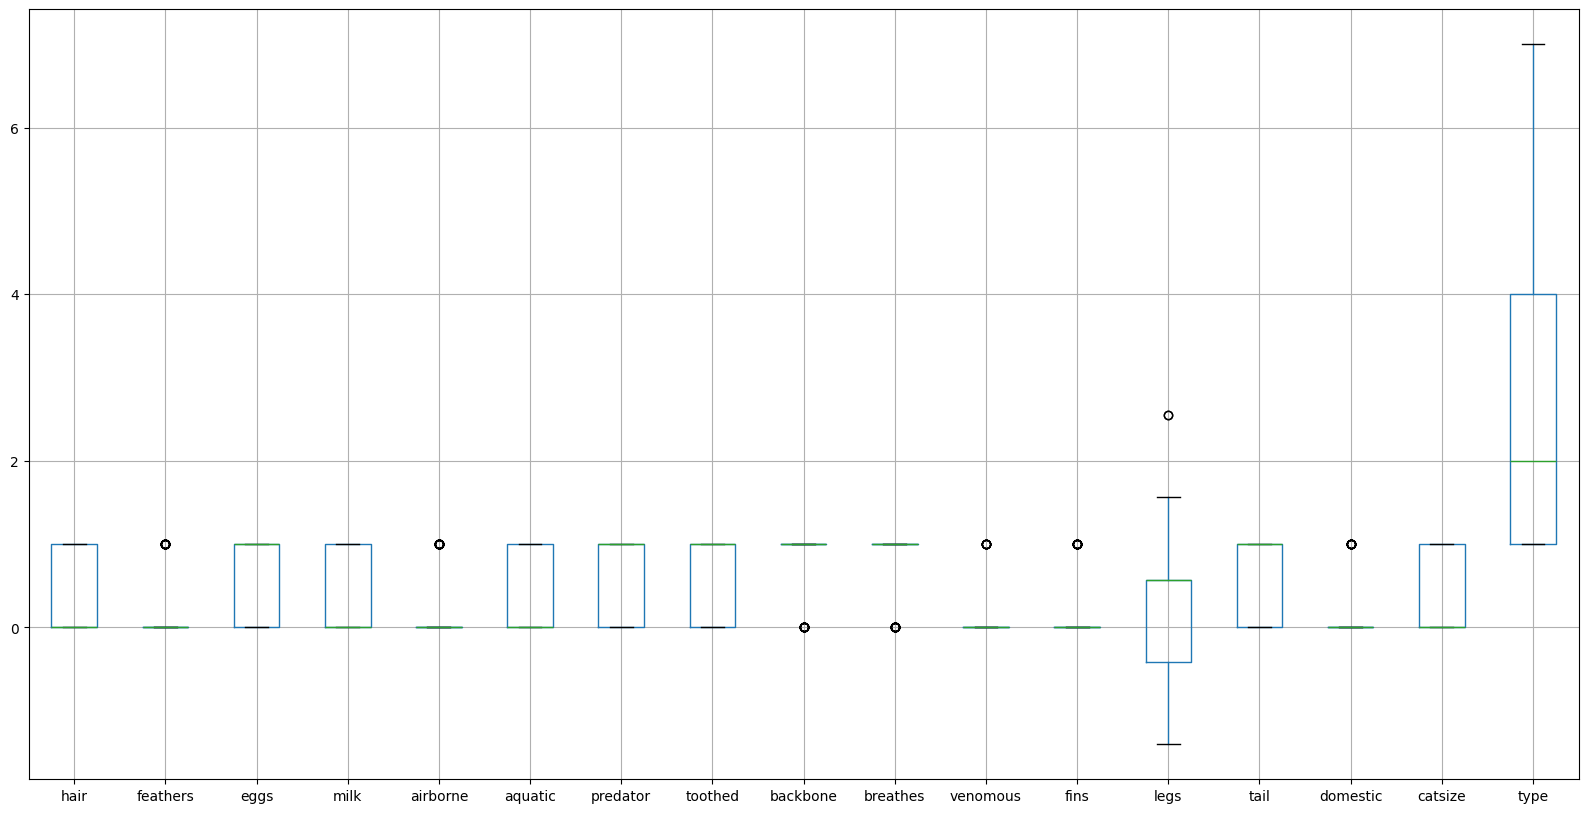

In [ ]:
# Visualizes boxplot
df.boxplot(figsize=(20,10))
plt.show()

In [ ]:
df.columns # Displays the columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
features=df.drop(['animal name','type'],axis=1) # Features variable
target=df['type'] # Target variable

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42) # Spliting the training and testing data

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train,y_train) # Training the model

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test) # Displays y_pred
y_pred

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [ ]:
accuracy_score(y_test,y_pred) # Displays accuracy score

0.9047619047619048

In [ ]:
# Displays the precsion, recall, f1-score ,support
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
# Displays cofusion matrix
confusion_mat=confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


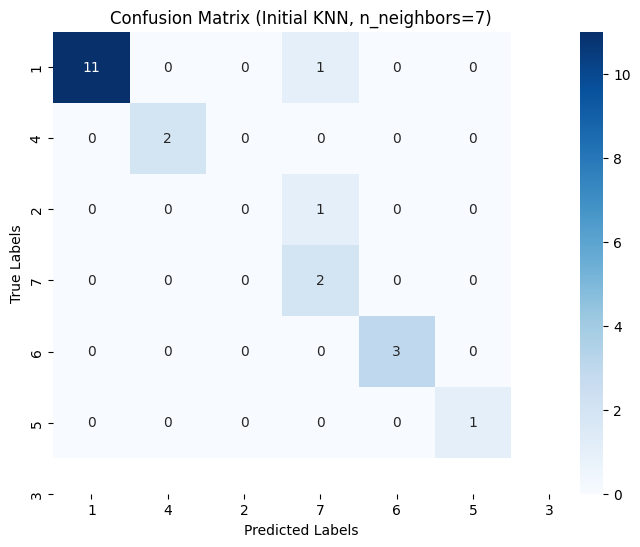

In [ ]:
#  Heat map of Confusion matrix for initial knn model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=df['type'].unique(), yticklabels=df['type'].unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Initial KNN, n_neighbors=7)")
plt.show()

In [ ]:
param_grid = {'n_neighbors': range(1, 21, 2),  # Odd values from 1 to 20
              'metric': ['euclidean', 'manhattan']}  # Test both distance metrics

In [ ]:
grid_search=GridSearchCV(knn,param_grid,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21, 2)})

In [ ]:
grid_search.best_params_ # Displays best parameters

{'metric': 'manhattan', 'n_neighbors': 3}

In [ ]:
best_knn=KNeighborsClassifier(metric='manhattan',n_neighbors=3) # Best model with best parameters

In [ ]:
best_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
y_pred_1=best_knn.predict(x_test) # Displays y_pred_1

In [ ]:
accuracy_score(y_test,y_pred_1) # Displays accuracy score

0.9523809523809523

In [ ]:
report1=classification_report(y_test,y_pred_1) #Classification report showing precision, recall , f1-score , support
print(report1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [ ]:
confusion_mat_1=confusion_matrix(y_test, y_pred_1) # Confusion matrix
print(confusion_mat_1)

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


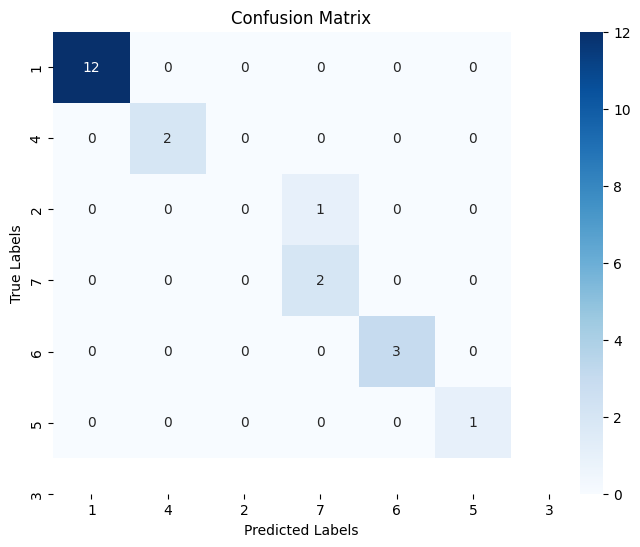

In [ ]:
# Heat map of confusion matrix of best_knn model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_1, annot=True, fmt="d", cmap="Blues",
            xticklabels=df['type'].unique(), yticklabels=df['type'].unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
x_train_pca[:5], x_test_pca[:5]  # Show a few transformed points to verify reduction

(array([[ 0.23001942, -0.60315904],
        [ 0.19379746, -0.59326267],
        [ 1.21718717, -1.79212382],
        [ 1.19380836,  1.07309258],
        [ 0.91611435, -1.66555235]]),
 array([[ 0.25747587,  1.06371909],
        [ 1.1571241 ,  1.00441798],
        [-1.14296926,  1.48194811],
        [ 1.12796374,  1.02819563],
        [ 1.12796374,  1.02819563]]))

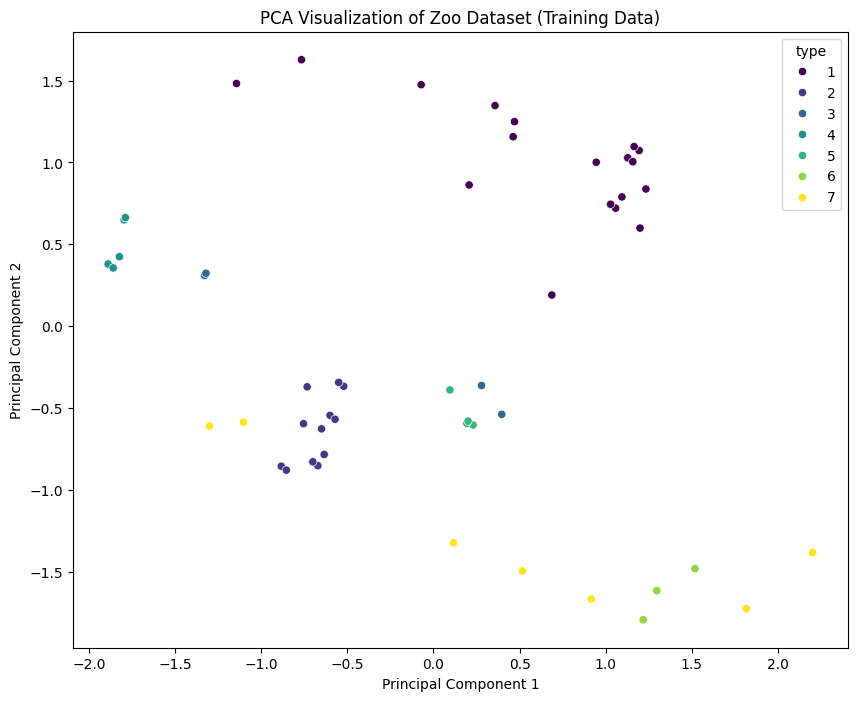

In [ ]:
# PCA Visualization of Zoo Dataset
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA Visualization of Zoo Dataset (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

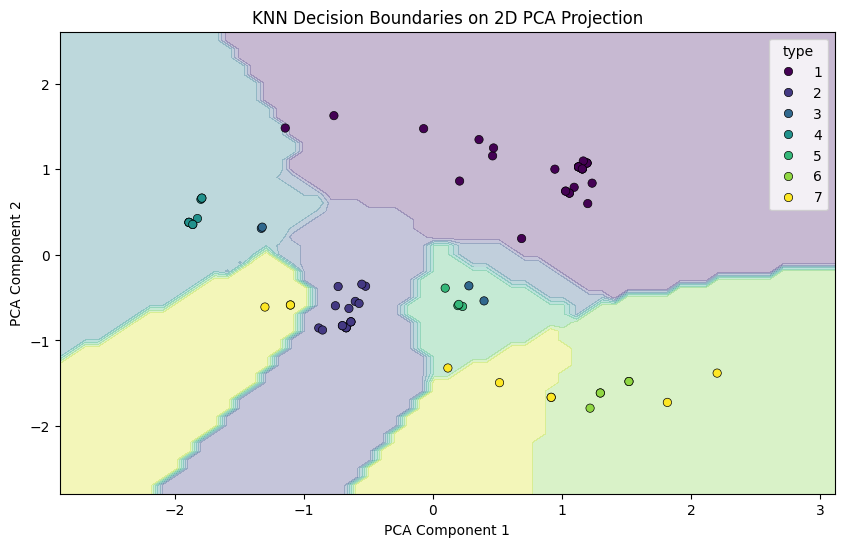

In [ ]:
# Train a new KNN model on the reduced 2D data
knn_visual = KNeighborsClassifier(n_neighbors=5)  # Using the same K as your main model
knn_visual.fit(x_train_pca, y_train)

# Plot decision boundaries
# Create a mesh grid based on the 2D PCA-transformed data
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh grid
Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries with training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, palette="viridis", edgecolor="k")
plt.title("KNN Decision Boundaries on 2D PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Interview Questions

1. What are the key hyperparameters in KNN?

 *  n_neighbors: This hyperparameter represents
the number of nearest neighbors to consider when making a prediction.

 * metric: This hyperparameter specifies the distance metric used to calculate the distance between data points.

 * weights: This hyperparameter controls how the neighbors' contributions are weighted when making a prediction.



2. What distance metrics can be used in KNN?



*   **Euclidean Distance**: This is the most common distance metric, representing the straight-line distance between two points in Euclidean space. It's calculated as the square root of the sum of squared differences between corresponding coordinates of two points. It's suitable for continuous numerical data and works well when features have similar scales.



* **Manhattan Distance**: Also known as Taxicab or City Block distance, it measures the distance between two points by summing the absolute differences of their coordinates. It's often used when dealing with discrete or categorical features, or when features have different scales.   

*   **Minkowski Distance**: This is a generalized distance metric that includes both Euclidean and Manhattan distances as special cases. It's controlled by a parameter 'p', where p=2 corresponds to Euclidean distance and p=1 corresponds to Manhattan distance.


* **Chebyshev Distance**: This metric calculates the maximum absolute difference between coordinates of two points. It's useful when you want to consider the feature with the largest difference as the most important.

* **Hamming Distance**: This metric is used for categorical data and measures the number of positions where two strings or vectors differ. It's often used in text processing and information retrieval.


